In [745]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # 1
from sklearn.metrics import confusion_matrix,roc_curve,auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # 2
from sklearn.linear_model import LogisticRegression# 3
import matplotlib.pyplot as plt

In [566]:
df = pd.read_csv(r"C:\Users\SURFACE\Downloads\new_framingham.csv")

In [567]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,39,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,46,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,48,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,61,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,46,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48,Secondary Edu,Yes,20.0,NaN,No,No,No,248.0,131.0,72.0,22.00,84.0,86.0,No,17520 days
4236,Female,44,Primary Edu,Yes,15.0,No,No,No,No,210.0,126.5,87.0,19.16,86.0,NaN,No,16060 days
4237,Female,52,Secondary Edu,No,0.0,No,No,No,No,269.0,133.5,83.0,21.47,80.0,107.0,No,18980 days
4238,Male,40,Tertiary Edu,No,0.0,No,No,Yes,No,185.0,141.0,98.0,25.60,67.0,72.0,No,14600 days


In [568]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
age_in_days          0
dtype: int64

In [569]:
def missing_value(column_name):
    if df.dtypes[column_name] == "O":
        MV = df[column_name].mode()[0]
    elif df[column_name].mean() > df[column_name].std():
        MV =df[column_name].mean()
    else:
        MV = df[column_name].median()
    df[column_name].fillna(MV, inplace=True)

missing_value("glucose")
missing_value("education")
missing_value("cigsPerDay")
missing_value("BPMeds")
missing_value("totChol")
missing_value("heartRate")
missing_value("BMI")

In [570]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_in_days        0
dtype: int64

In [571]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,39,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,46,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,48,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,61,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,46,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [572]:
# Drop Age Columns
df.drop(columns=["age"], inplace = True)

In [573]:
df.head()

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [574]:
 #Creation / convertion of gender to numerical value
 # Using lambda and `.replace` to change the values of gender
df['gender'] = df['male'].apply(lambda x: 1 if x=='Male' else 0)

In [575]:
df.head()

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,Male,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,Female,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,Male,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1
3,Female,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0
4,Female,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0


In [576]:
# replacement = {'Female':0, 'Male':1}
df['male'].replace({'Female':0, 'Male':1})

0       1
1       0
2       1
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    1
4239    0
Name: male, Length: 4240, dtype: int64

In [577]:
df.head()

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,Male,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,Female,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,Male,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1
3,Female,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0
4,Female,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0


In [578]:
df.drop(columns=["male"], inplace = True)

In [579]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1
3,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0
4,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0


In [580]:
df.education

0           post grad
1       Secondary Edu
2         Primary Edu
3        Tertiary Edu
4        Tertiary Edu
            ...      
4235    Secondary Edu
4236      Primary Edu
4237    Secondary Edu
4238     Tertiary Edu
4239     Tertiary Edu
Name: education, Length: 4240, dtype: object

In [581]:
#Changing education to numerical using replace method 
# df['education'].replace({'Primary Edu':1, 'Secondary Edu':2, "Tertiary Edu" :3, "post grad":4}, inplace = True)
df["education"] = df["education"].apply (lambda x: 1 if x == "Primary Edu" else 2 if x == "Secondary Edu" else 3 if x == "Tertiary Edu" else 4)

In [582]:
df.education

0       4
1       2
2       1
3       3
4       3
       ..
4235    2
4236    1
4237    2
4238    3
4239    3
Name: education, Length: 4240, dtype: int64

In [583]:
df["currentSmoker"]= df.currentSmoker.map({"No":0, "Yes":1})

In [584]:
df.currentSmoker

0       0
1       0
2       1
3       1
4       1
       ..
4235    1
4236    1
4237    0
4238    0
4239    1
Name: currentSmoker, Length: 4240, dtype: int64

In [585]:
df['BPMeds']=df.BPMeds.apply(lambda A: 1 if A == 'Yes' else 0)
# df["BPMeds"].replace({"No":0, "Yes": 1})

In [586]:
#To check if BPMeds has 1
df.BPMeds

0       0
1       0
2       0
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: BPMeds, Length: 4240, dtype: int64

In [587]:
df["prevalentStroke"] = df.prevalentStroke.apply(lambda ps: 1 if ps == "Yes" else 0)

In [588]:
df.prevalentStroke

0       0
1       0
2       0
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: prevalentStroke, Length: 4240, dtype: int64

In [589]:
df["prevalentHyp"] = df.prevalentHyp.apply(lambda ph: 1 if ph == "Yes" else 0)

In [590]:
df.prevalentHyp

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    1
4239    0
Name: prevalentHyp, Length: 4240, dtype: int64

In [591]:
df["diabetes"].replace({"No":0, "Yes":1 }, inplace = True)

In [592]:
df["TenYearCHD"].replace({"No":0, "Yes":1}, inplace =True)

<Axes: >

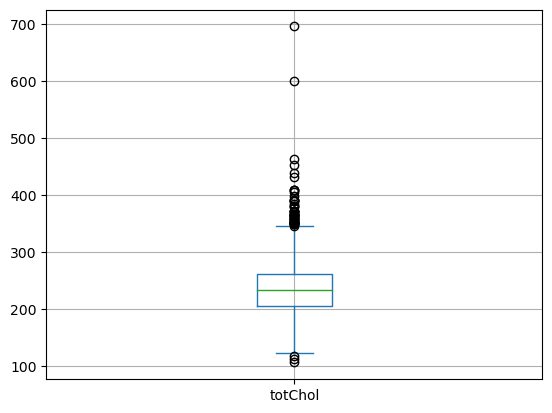

In [593]:
df["totChol"].plot (kind = "box", grid = True)

In [594]:
df.totChol.describe()

count    4240.000000
mean      236.699523
std        44.327521
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64

In [595]:
## Capping the outlires in totChols to 263 using Lambda

df['totChol'] = df.totChol.apply(lambda x: x if x < 263 else 263)

<Axes: >

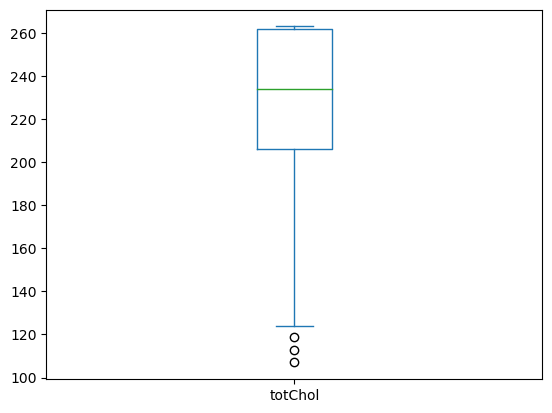

In [596]:
df["totChol"].plot (kind = "box")

<Axes: xlabel='totChol', ylabel='Count'>

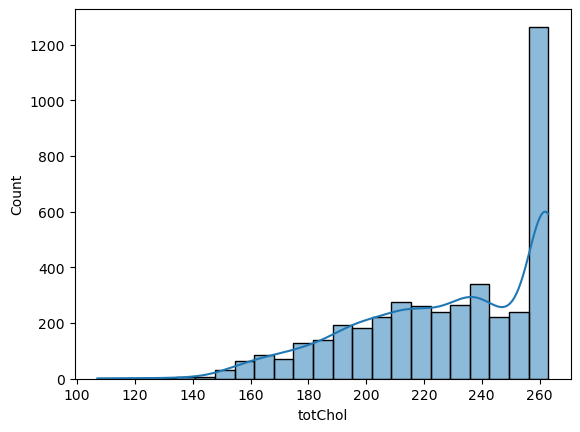

In [597]:
# Checking the histogram after capping

sns.histplot(df['totChol'], kde=True)

<Axes: xlabel='cigsPerDay', ylabel='Count'>

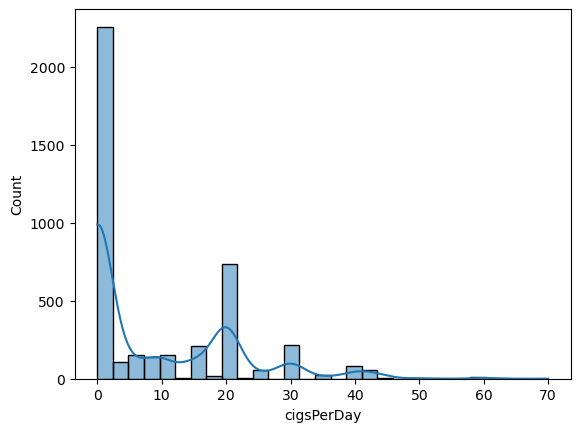

In [598]:
sns.histplot(df['cigsPerDay'], kde=True)

In [599]:
# Striping days from `age_in_days`

df['age_in_days'].str.strip('days')

0       14235 
1       16790 
2       17520 
3       22265 
4       16790 
         ...  
4235    17520 
4236    16060 
4237    18980 
4238    14600 
4239    14235 
Name: age_in_days, Length: 4240, dtype: object

In [600]:
df["days"] = df['age_in_days'].str.strip('days')

In [601]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,1,14235
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,1,17520
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265
4,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790


In [602]:
# ANother method df['age_in_days'].str.split(" ", expand=True)[0] The 0 can be 1 depending on what you to remove 
df['days'] = df['days'].astype(int)

In [603]:
df["age"] = df["days"] //365

In [604]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,1,14235,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,1,17520,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265,61
4,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790,46


In [645]:
mL = df.copy()

In [646]:
mL.to_csv("mL", index = False)

In [647]:
mL = pd.read_csv(r"C:\Users\SURFACE\OneDrive\Desktop\Data Science\Data-Science-Class\mL")

In [648]:
mL.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,1,14235,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,1,17520,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265,61
4,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790,46


In [649]:
mL.drop(columns = ["age_in_days"], inplace = True)

In [650]:
mL.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,days,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,14235,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,16790,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,17520,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,22265,61
4,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,0,16790,46


In [651]:
X  = mL.drop(columns=['TenYearCHD'], axis=0)
y = mL.TenYearCHD

In [652]:
X.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender,days,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,14235,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,17520,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,22265,61
4,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790,46


In [653]:
from sklearn.model_selection import train_test_split

In [654]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.20, random_state=42)

In [655]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3392, 16)
X_test shape:  (848, 16)
y_train shape:  (3392,)
y_test shape:  (848,)


In [656]:
dtc = DecisionTreeClassifier()

In [657]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [658]:
y_pred = dtc.predict(X_test)

In [659]:
dtc.score(X_train,y_train)

1.0

In [660]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7488207547169812

<Axes: xlabel='TenYearCHD'>

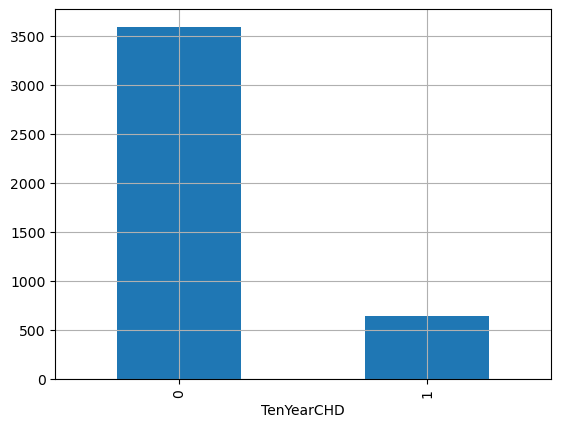

In [661]:
df.TenYearCHD.value_counts().plot(kind='bar', grid=True)

In [722]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [723]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.25, random_state=47)

In [724]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3180, 16)
X_test shape:  (1060, 16)
y_train shape:  (3180,)
y_test shape:  (1060,)


In [725]:
rfc = RandomForestClassifier()

In [726]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [727]:
y_pred = rfc.predict(X_test)

In [728]:
rfc.score(X_train,y_train)

1.0

In [729]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8462264150943396

<Axes: xlabel='TenYearCHD'>

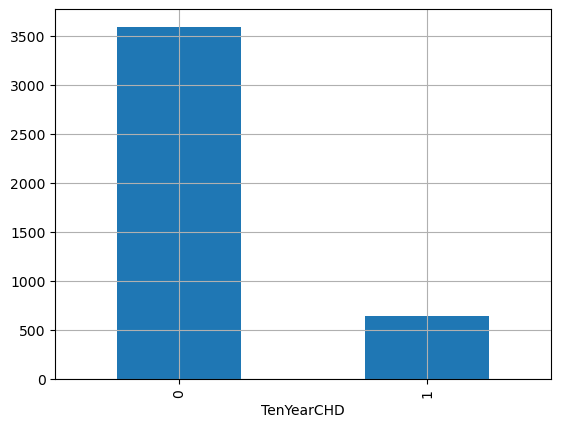

In [730]:
mL.TenYearCHD.value_counts().plot(kind='bar', grid=True)

In [731]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.25, random_state=47)

In [732]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3180, 16)
X_test shape:  (1060, 16)
y_train shape:  (3180,)
y_test shape:  (1060,)


In [733]:
mlp = MLPClassifier()

In [734]:
mlp.fit(X_train,y_train)

MLPClassifier()

In [735]:
y_pred = mlp.predict(X_test)

In [736]:
mlp.score(X_train,y_train)

0.8367924528301887

In [737]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8367924528301887

In [738]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.25, random_state=52)

In [739]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3180, 16)
X_test shape:  (1060, 16)
y_train shape:  (3180,)
y_test shape:  (1060,)


In [740]:
lre = LogisticRegression ()

In [741]:
lre.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [742]:
y_pred = lre.predict(X_test)

In [743]:
lre.score(X_train,y_train)

0.85

In [744]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8537735849056604